# Sample R Notebook

Note: I found it easier to install packages in terminal or R/RStudio. Once installed, libraries can be used normally.

In [9]:
require(ggplot2)   #like library()
require(dplyr)
require(lubridate)
require(skimr)
require(repr)

Loading required package: repr



In [3]:
df = read.csv("data/registration_times.csv")
names(df)
dim(df)

[1] "Registration.Time" "org"

[1] 266   2

In [4]:
head(df)

,Registration.Time,org
,<chr>,<chr>
1,2022-10-19 13:43:15,cu
2,2022-10-19 18:53:05,cu
3,2022-10-27 09:56:39,cu
4,2022-10-25 13:45:37,cu
5,2022-10-20 09:37:27,cu
6,2022-10-20 01:22:22,cu


In [5]:
df$Registration.Time = ymd_hms(df$Registration.Time)
df$org = factor(df$org, levels=c('wcm', 'cu', 'other'))
head(df)

,Registration.Time,org
,<dttm>,<fct>
1,2022-10-19 13:43:15,cu
2,2022-10-19 18:53:05,cu
3,2022-10-27 09:56:39,cu
4,2022-10-25 13:45:37,cu
5,2022-10-20 09:37:27,cu
6,2022-10-20 01:22:22,cu


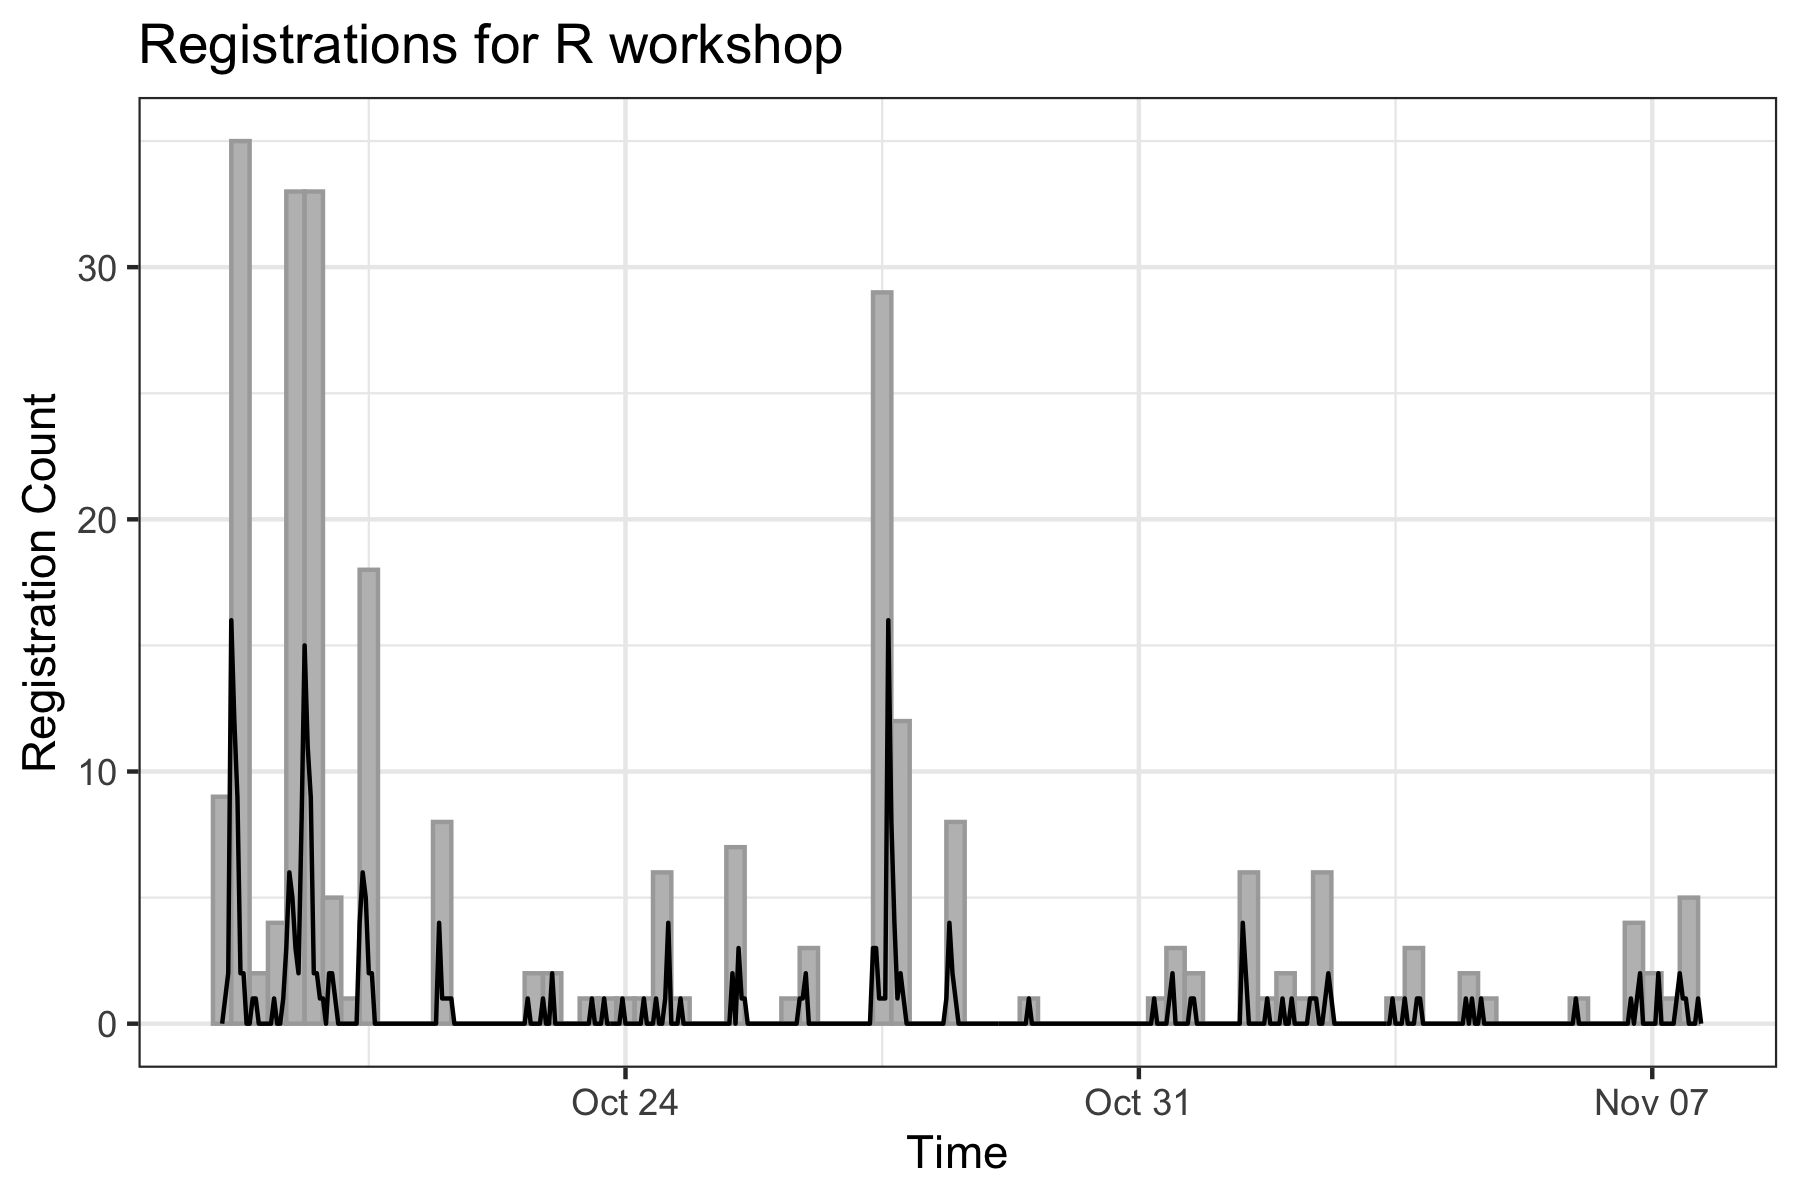

In [18]:
plot_df = (
  df 
  %>% arrange(Registration.Time) 
  %>% filter(Registration.Time >= ymd_hm("2022-10-18 13:00"))
)
my_plot = (
  ggplot(plot_df, aes(x=Registration.Time))
  #+ geom_histogram(binwidth = 60*60*24) #, color="darkgrey", fill="grey") #600s = 10mins
  + geom_histogram(binwidth = 60*60*6, color="darkgrey", fill="grey")
  + geom_freqpoly(binwidth = 60*60) #600 s = 10 minutes
  + theme_bw()
  + ggtitle("Registrations for R workshop")
  + xlab("Time")
  + ylab("Registration Count") 
)
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res = 300, jupyter.plot_mimetypes = "image/png")
my_plot


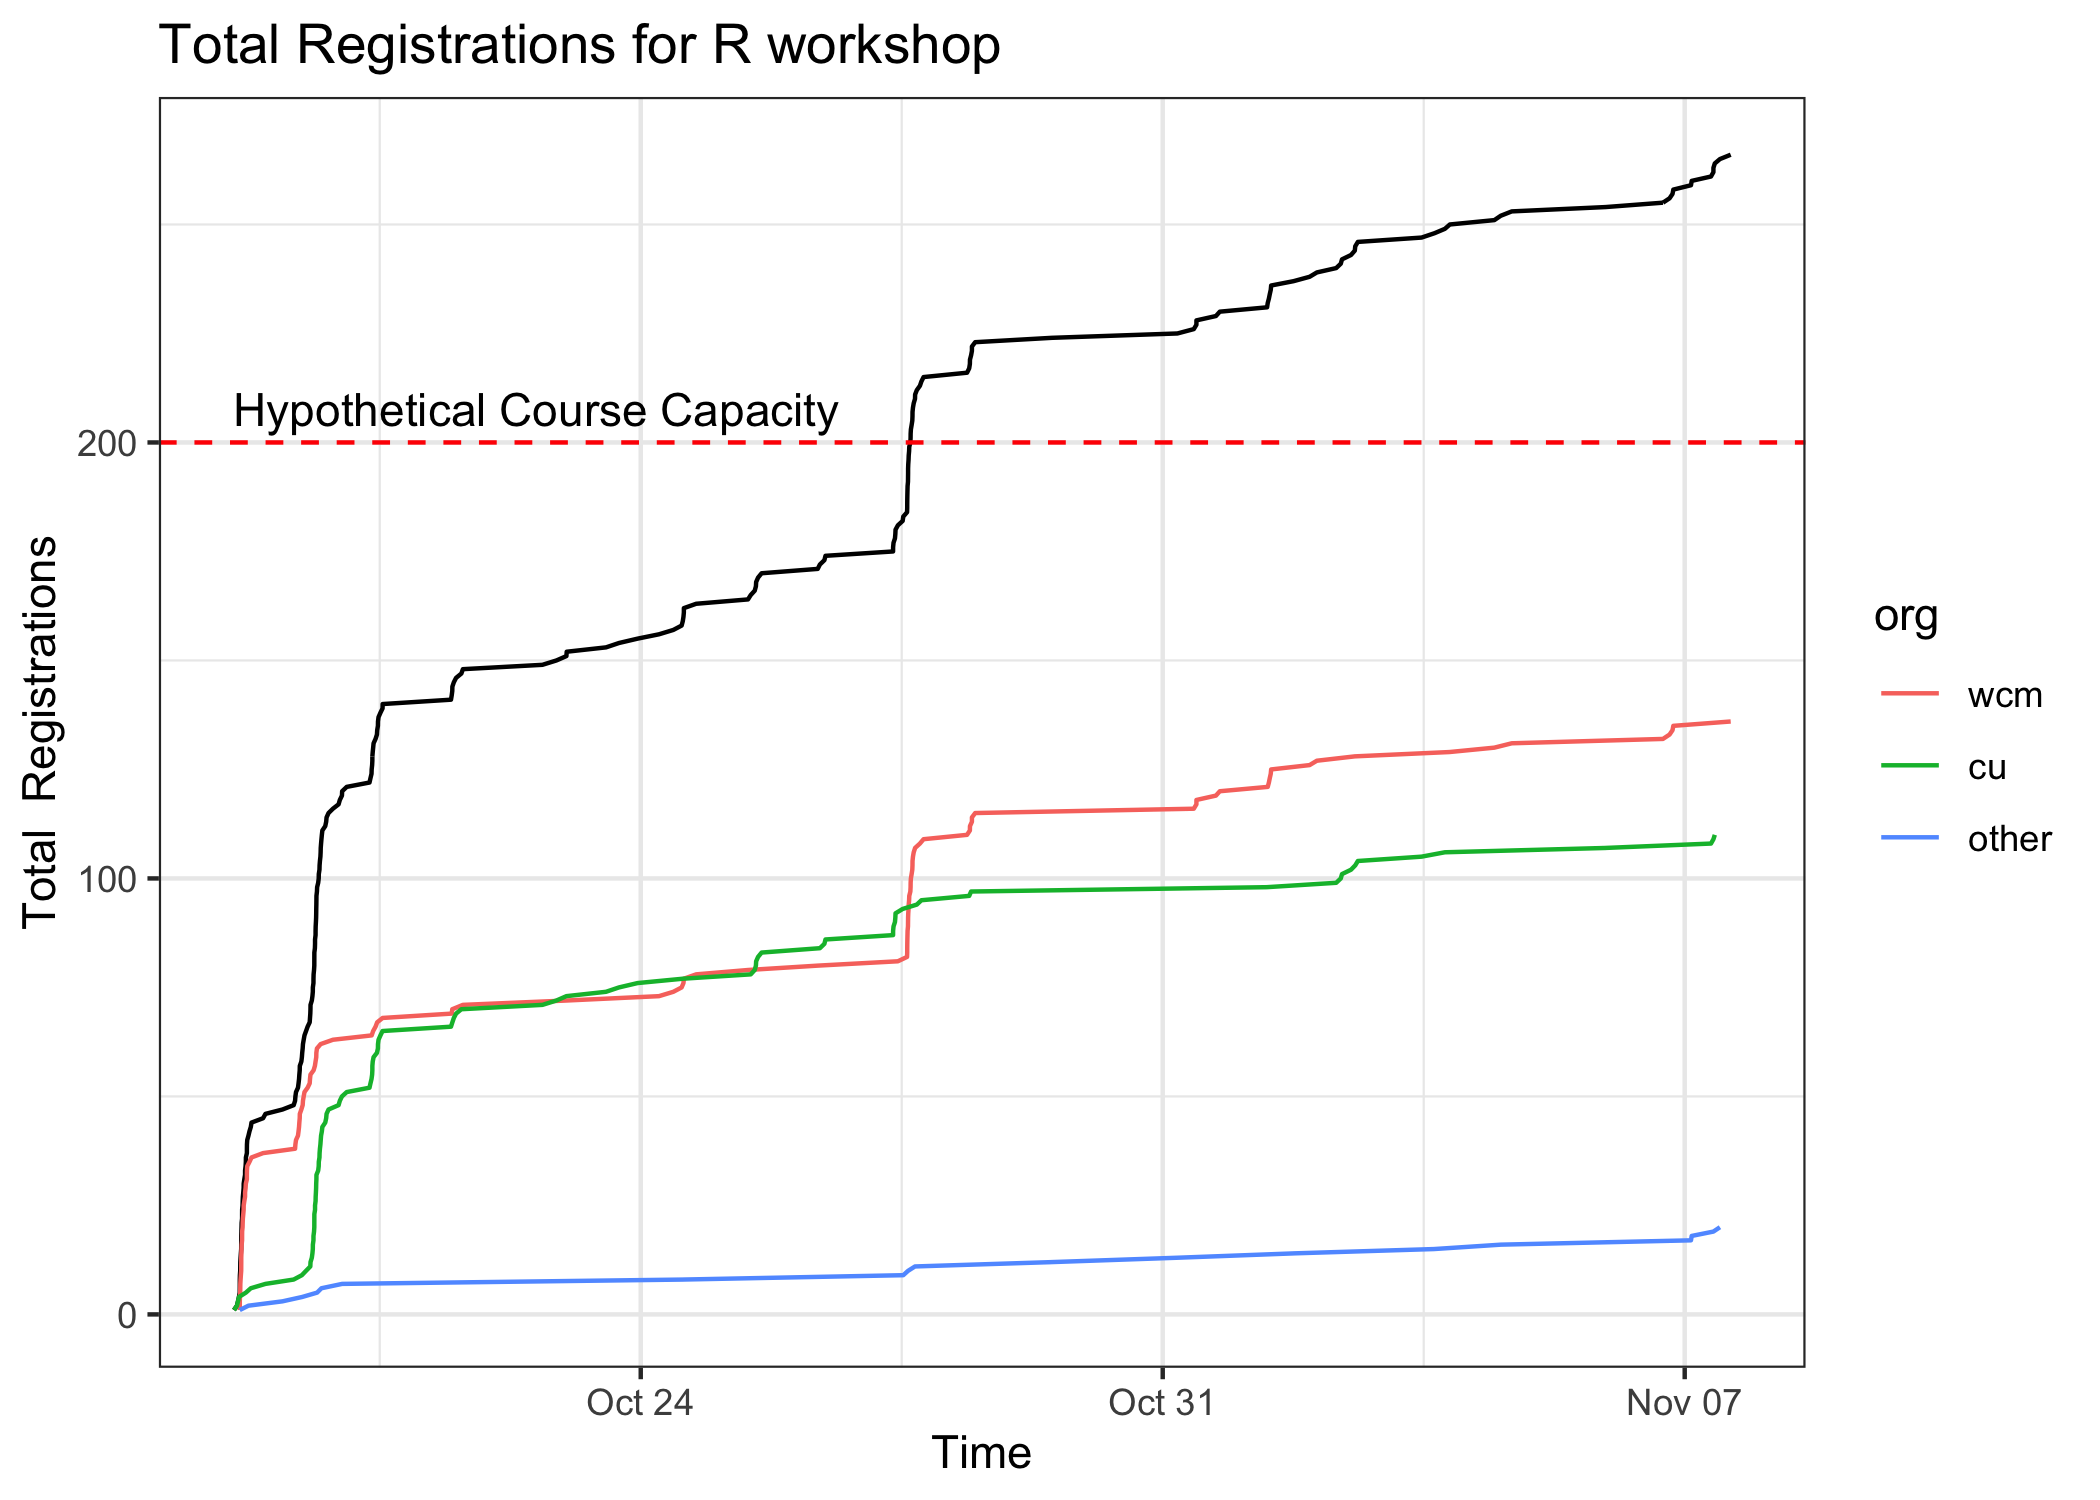

In [20]:
options(repr.plot.width=7, repr.plot.height=5, repr.plot.res = 300, jupyter.plot_mimetypes = "image/png")

plot_df = (
  df 
  %>% arrange(Registration.Time) 
  %>% filter(
      Registration.Time >= ymd_hm("2022-10-18 13:00")
      #& Registration.Time < ymd_hm("2022-10-20 13:00")
    )
  %>% mutate(cumtotal = row_number(Registration.Time))
  %>% group_by(org) 
    %>% mutate(cumgrptotal = row_number(Registration.Time))
  %>% ungroup()
)

## inspect the data
(
  ggplot(plot_df, aes(x=Registration.Time, y=cumtotal))
  + geom_line() 
  + theme_bw()
  + ggtitle("Total Registrations for R workshop")
  + xlab("Time")
  + ylab("Total  Registrations")
  #+ geom_point(aes(color=org), shape="cross")
  + geom_line(aes(y=cumgrptotal, color=org))
  + geom_hline(yintercept = 200, linetype="dashed", color='red')
  + annotate("text", x=ymd_hm("2022-10-18 13:00"), y=200, label="Hypothetical Course Capacity", hjust=0, vjust=-.5)
)
